In [170]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt

In [84]:
#import training and validation set
df= pd.read_csv('data/TrainAndValid.csv',
                low_memory=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [7]:
df.describe().T

count          mean           std        min  \
SalesID                   412698.0  2.011161e+06  1.080068e+06  1139246.0   
SalePrice                 412698.0  3.121518e+04  2.314174e+04     4750.0   
MachineID                 412698.0  1.230061e+06  4.539533e+05        0.0   
ModelID                   412698.0  6.947202e+03  6.280825e+03       28.0   
datasource                412698.0  1.351694e+02  9.646749e+00      121.0   
auctioneerID              392562.0  6.585268e+00  1.715841e+01        0.0   
YearMade                  412698.0  1.899050e+03  2.921902e+02     1000.0   
MachineHoursCurrentMeter  147504.0  3.522988e+03  2.716993e+04        0.0   

                                 25%        50%         75%        max  
SalesID                   1421897.75  1645852.5  2261012.50  6333349.0  
SalePrice                   14500.00    24000.0    40000.00   142000.0  
MachineID                 1088593.25  1284397.0  1478079.25  2486330.0  
ModelID                      3261.00     4605.0     8899.00    37198.0  
datasource                    132.00      132.0      136.00      173.0  
auctioneerID                    1.00        2.0        4.00       99.0  
YearMade                     1985.00     1995.0     2001.00     2014.0  
MachineHoursCurrentMeter        0.00        0.0     3209.00  2483300.0

In [9]:
df_info = pd.read_excel('data/Data Dictionary.xlsx' , engine="openpyxl")

/home/d7311245-0714-4357-9839-f61ebcc27d67/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [59]:
df_info.head()

Description
Variable                                                       
SalesID         unique identifier of a particular sale of a ...
MachineID       identifier for a particular machine;  machin...
ModelID         identifier for a unique machine model (i.e. ...
datasource      source of the sale record;  some sources are...
auctioneerID    identifier of a particular auctioneer, i.e. ...

In [13]:
df_info = pd.read_excel('data/Data Dictionary.xlsx' , engine="openpyxl" , index_col= 'Variable')

/home/d7311245-0714-4357-9839-f61ebcc27d67/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [19]:
df_info = df_info.drop('Unnamed: 2' ,axis =1)

In [45]:
df_info.head()

Description
Variable                                                       
SalesID         unique identifier of a particular sale of a ...
MachineID       identifier for a particular machine;  machin...
ModelID         identifier for a unique machine model (i.e. ...
datasource      source of the sale record;  some sources are...
auctioneerID    identifier of a particular auctioneer, i.e. ...

In [31]:
print(df_info.loc['SalesID']['Description'])

  unique identifier of a particular sale of a machine at auction


In [33]:
def get_info (data):
    print(df_info.loc[data]['Description'])

In [37]:
get_info('ModelID')

  identifier for a unique machine model (i.e. fiModelDesc)


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [47]:
get_info('Saledate')

  time of sale


In [86]:
df['saledate'][:100]

0     11/16/2006 0:00
1      3/26/2004 0:00
2      2/26/2004 0:00
3      5/19/2011 0:00
4      7/23/2009 0:00
           ...       
95    12/15/2005 0:00
96     1/29/2004 0:00
97     9/18/2008 0:00
98     11/3/2005 0:00
99      6/1/2006 0:00
Name: saledate, Length: 100, dtype: object

In [49]:
get_info('UsageBand')

  value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel;  e.g. 'Low' means this machine has less hours given it's lifespan relative to average of fiBaseModel.


In [51]:
get_info('fiBaseModel')

  disaggregation of fiModelDesc


In [53]:
df.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

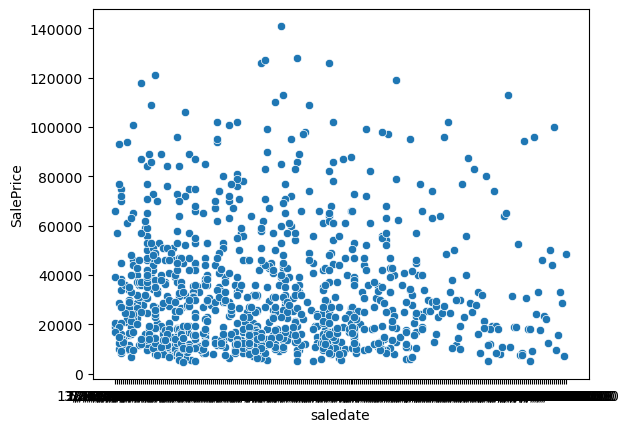

In [67]:
sns.scatterplot(df, x= df['saledate'][:1000], y=df['SalePrice']);

<Axes: ylabel='Frequency'>

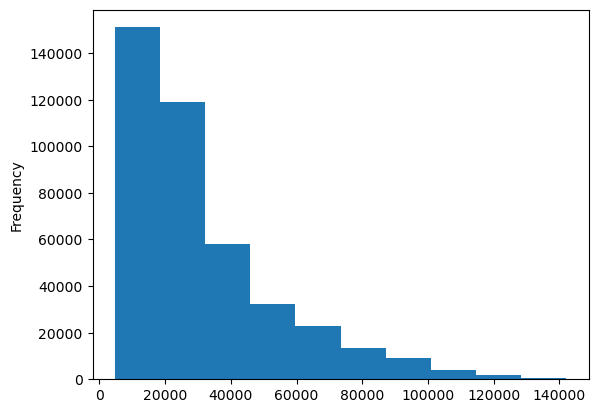

In [75]:
df['SalePrice'].plot.hist()

## Parsing Datas using parse_date


In [88]:
df= pd.read_csv ('data/TrainAndValid.csv',
                 low_memory=False,
                  parse_dates=['saledate'])

In [90]:
df['saledate'][:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

In [96]:
df.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246    66000.0     999089     3157         121           3.0      2004   
1  1139248    57000.0     117657       77         121           3.0      1996   
2  1139249    10000.0     434808     7009         121           3.0      2001   
3  1139251    38500.0    1026470      332         121           3.0      2001   
4  1139253    11000.0    1057373    17311         121           3.0      2007   

   MachineHoursCurrentMeter UsageBand   saledate  ... Undercarriage_Pad_Width  \
0                      68.0       Low 2006-11-16  ...                     NaN   
1                    4640.0       Low 2004-03-26  ...                     NaN   
2                    2838.0      High 2004-02-26  ...                     NaN   
3                    3486.0      High 2011-05-19  ...                     NaN   
4                     722.0    Medium 2009-07-23  ...                     NaN   

  Stick_Length Thumb Pattern_Changer Grouser_Type Backhoe_Mounting Blade_Type  \
0          NaN   NaN             NaN          NaN              NaN        NaN   
1          NaN   NaN             NaN          NaN              NaN        NaN   
2          NaN   NaN             NaN          NaN              NaN        NaN   
3          NaN   NaN             NaN          NaN              NaN        NaN   
4          NaN   NaN             NaN          NaN              NaN        NaN   

  Travel_Controls Differential_Type Steering_Controls  
0             NaN          Standard      Conventional  
1             NaN          Standard      Conventional  
2             NaN               NaN               NaN  
3             NaN               NaN               NaN  
4             NaN               NaN               NaN  

[5 rows x 53 columns]

In [102]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [106]:
df['saledate'].head(10)

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

In [110]:
### Sort DataFram by saledate

df.sort_values(by = ['saledate'] , inplace= True,  ascending= True)
df['saledate'].head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [116]:
# Copy of our data
df_temp =df.copy()

In [124]:
df_temp['saleYear']  = df_temp['saledate'].dt.year
df_temp['saleMonth'] = df_temp['saledate'].dt.month
df_temp['saleDay'] = df_temp ['saledate'].dt.day
df_temp['saleDayOfWeek'] = df_temp ['saledate'].dt.dayofweek
df_temp['saleDayOfYear'] = df_temp['saledate'].dt.dayofyear

In [128]:
#Now We can remove sale date
df_temp.drop('saledate' , axis =1 , inplace= True)

In [132]:
get_info('State')

  US State in which sale occurred


In [134]:
df_temp['state'].value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

In [150]:
df_temp['ProductSize'].value_counts()

ProductSize
Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: count, dtype: int64

<Axes: xlabel='ProductSize', ylabel='SalePrice'>

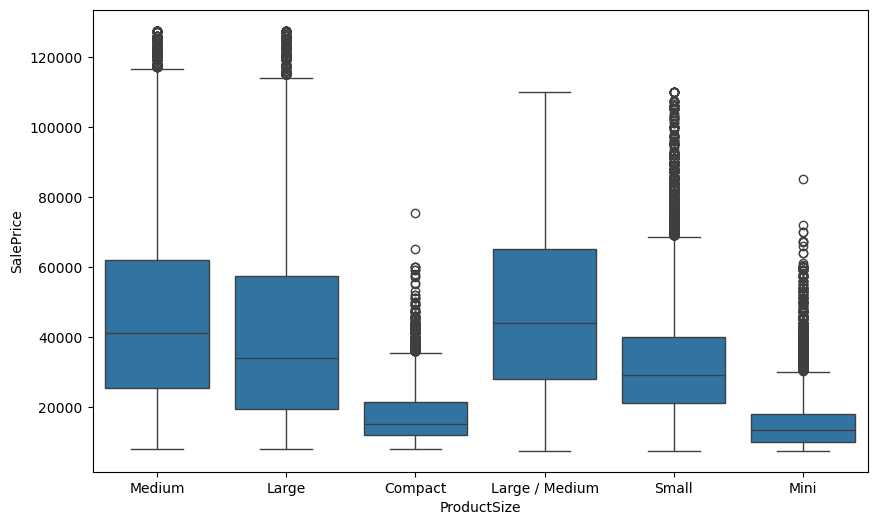

In [164]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df_temp['ProductSize'] , y = df_temp ['SalePrice'])

In [172]:
df_temp.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Convert string data to categorial


In [177]:
df_temp.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
205615  1646770     9500.0    1126363     8434         132          18.0   
274835  1821514    14000.0    1194089    10150         132          99.0   
141296  1505138    50000.0    1473654     4139         132          99.0   
212552  1671174    16000.0    1327630     8591         132          99.0   
62755   1329056    22000.0    1336053     4089         132          99.0   

        YearMade  MachineHoursCurrentMeter UsageBand fiModelDesc  ...  \
205615      1974                       NaN       NaN        TD20  ...   
274835      1980                       NaN       NaN         A66  ...   
141296      1978                       NaN       NaN         D7G  ...   
212552      1980                       NaN       NaN         A62  ...   
62755       1984                       NaN       NaN         D3B  ...   

           Backhoe_Mounting Blade_Type      Travel_Controls Differential_Type  \
205615  None or Unspecified   Straight  None or Unspecified               NaN   
274835                  NaN        NaN                  NaN          Standard   
141296  None or Unspecified   Straight  None or Unspecified               NaN   
212552                  NaN        NaN                  NaN          Standard   
62755   None or Unspecified        PAT                Lever               NaN   

       Steering_Controls saleYear saleMonth saleDay saleDayOfWeek  \
205615               NaN     1989         1      17             1   
274835      Conventional     1989         1      31             1   
141296               NaN     1989         1      31             1   
212552      Conventional     1989         1      31             1   
62755                NaN     1989         1      31             1   

       saleDayOfYear  
205615            17  
274835            31  
141296            31  
212552            31  
62755             31  

[5 rows x 57 columns]

In [189]:
pd.api.types.is_object_dtype(df_temp['Backhoe_Mounting'])

True

In [213]:
for label , content in df_temp.items():
    if pd.api.types.is_string_dtype(content)or pd.api.types.is_object_dtype(content):
        print(label)


UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [215]:
for label , content in df_temp.items():
    if pd.api.types.is_string_dtype(content) or pd.api.types.is_object_dtype(content):
        df_temp[label]=content.astype('category').cat.as_ordered()

In [217]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [219]:
df_temp['state'].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [223]:
df_temp['state'].value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

In [229]:
df_temp['state'].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [231]:
## Now we can have access to all of our data in the form of numbers

In [235]:
df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [237]:
## save the current data to csv 
df_temp.to_csv('data/train_temp.csv', index=False)

In [239]:
df_temp = pd.read_csv('data/train_temp.csv', low_memory= False)

In [245]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

## Filling Missing values
First numeric data

In [252]:
for label , content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [276]:
df_temp['ModelID'].isna().sum()

0

In [256]:
#check to see if there is any null value
for label , content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [258]:
get_info('auctioneerID')

  identifier of a particular auctioneer, i.e. company that sold the machine at auction.  Not the same as datasource.


In [260]:
get_info('MachineHoursCurrentMeter')

  current usage of the machine in hours at time of sale (saledate);  null or 0 means no hours have been reported for that sale


In [266]:
for label , content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #add a binary column which tell us if data was missing
            df_temp[label+'_is_missing'] = pd.isnull(content)
            # fill with median
            df_temp[label] = content.fillna(content.median() )

In [274]:
for label , content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
print('there is no null value')

there is no null value


In [280]:
df_temp['auctioneerID_is_missing'].value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [282]:
df_temp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [284]:
## find the null values in categorial data
for label , content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
print('there is no null value')

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
there is no null value


In [286]:
get_info('UsageBand')

  value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel;  e.g. 'Low' means this machine has less hours given it's lifespan relative to average of fiBaseModel.


In [292]:
df_temp['UsageBand'].value_counts()

UsageBand
Medium    35832
Low       25311
High      12527
Name: count, dtype: int64

In [296]:
## Turn categorial to numbers then fill it

for label , content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add binary coplumn to indicate which was missing
        df_temp[label+'_is_missing']= pd.isnull(content)
        #Turn Categories into numbers
        df_temp[label] = pd.Categorical(content).codes+1

In [300]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## Now all of or data are numeric we can fit it to a machine learning model

In [304]:
df_temp.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1646770     9500.0    1126363     8434         132          18.0      1974   
1  1821514    14000.0    1194089    10150         132          99.0      1980   
2  1505138    50000.0    1473654     4139         132          99.0      1978   
3  1671174    16000.0    1327630     8591         132          99.0      1980   
4  1329056    22000.0    1336053     4089         132          99.0      1984   

   MachineHoursCurrentMeter  UsageBand  fiModelDesc  ...  \
0                       0.0          0         4593  ...   
1                       0.0          0         1820  ...   
2                       0.0          0         2348  ...   
3                       0.0          0         1819  ...   
4                       0.0          0         2119  ...   

   Undercarriage_Pad_Width_is_missing  Stick_Length_is_missing  \
0                                True                     True   
1                                True                     True   
2                                True                     True   
3                                True                     True   
4                                True                     True   

   Thumb_is_missing  Pattern_Changer_is_missing  Grouser_Type_is_missing  \
0              True                        True                     True   
1              True                        True                     True   
2              True                        True                     True   
3              True                        True                     True   
4              True                        True                     True   

   Backhoe_Mounting_is_missing  Blade_Type_is_missing  \
0                        False                  False   
1                         True                   True   
2                        False                  False   
3                         True                   True   
4                        False                  False   

   Travel_Controls_is_missing  Differential_Type_is_missing  \
0                       False                          True   
1                        True                         False   
2                       False                          True   
3                        True                         False   
4                       False                          True   

   Steering_Controls_is_missing  
0                          True  
1                         False  
2                          True  
3                         False  
4                          True  

[5 rows x 103 columns]

In [347]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [308]:
%%time
model = RandomForestRegressor(n_jobs=1,
                              random_state=42)
#firt the model
model.fit(df_temp.drop('SalePrice' ,axis=1) ,df_temp['SalePrice'])

CPU times: user 15min 13s, sys: 6.87 s, total: 15min 19s
Wall time: 16min 42s


RandomForestRegressor(n_jobs=1, random_state=42)

In [310]:
model.score(df_temp.drop('SalePrice' ,axis=1) ,df_temp['SalePrice'])

0.9875468079970562

## Split our data 

In [320]:
df_temp['saleYear']


0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [325]:
df_temp['saleYear'].value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [337]:
# Split data into training and validation

df_val = df_temp[df_temp['saleYear']==2012]
df_train = df_temp[df_temp['saleYear'] != 2012]
len(df_val), len(df_train)


(11573, 401125)

In [341]:
X_train , y_train = df_train.drop('SalePrice' , axis=1) , df_train['SalePrice']
X_test, y_test = df_val.drop('SalePrice' ,axis =1) , df_val['SalePrice']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [343]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

In [385]:
## Create evauation function
from sklearn.metrics import mean_absolute_error, mean_squared_log_error , r2_score

def rmsle(y_test, y_preds):

    return np.sqrt(mean_squared_log_error(y_test, y_preds))
### Create fuction to evaluate model on few levels
def show_scores(model):
    train_preds = model.predict (X_train)
    val_preds = model.predict(X_test)
    scores = {'Traning MAE' : mean_absolute_error(y_train , train_preds),
              'Valid MAE' : mean_absolute_error(y_test, val_preds),
              'Traning RMSLE' : rmsle(y_train, train_preds),
              'Valid RMSLE' : rmsle(y_test, val_preds),
              'Tranin R2' :r2_score (y_train , train_preds),
               'ValidR^2' : r2_score(y_test , val_preds)}
    return scores

## Testig the model on subset to tune the hyperparameters

In [357]:
#Change max_sample values

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)


In [359]:
%%time 
model.fit(X_train , y_train)

CPU times: user 39.2 s, sys: 474 ms, total: 39.7 s
Wall time: 17.6 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [387]:
show_scores(model)

{'Traning MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Traning RMSLE': 0.2577453782569771,
 'Valid RMSLE': 0.2936263867108901,
 'Tranin R2': 0.8606658995199189,
 'ValidR^2': 0.8320374995090507}

In [421]:
from sklearn.model_selection import RandomizedSearchCV

## Diffrent parameter
rf_grid = {'n_estimators' : np.arange(10,100,10),
           'max_depth' : [None , 3, 5, 10],
           'min_samples_split' : np.arange(2,20,2),
           'min_samples_leaf' : np.arange(1,20,2),
           'max_features' : [0.5, 1, 'sqrt' , 'auto'],
            'max_samples' : [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter = 2,
                              cv=5,
                              verbose= True)

rs_model.fit(X_train , y_train)
                                                    

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [423]:
# Find the best model hyper
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 8,
 'min_samples_leaf': 9,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': None}

In [425]:
show_scores(rs_model)

{'Traning MAE': 8132.692325655652,
 'Valid MAE': 9697.799619543337,
 'Traning RMSLE': 0.358197467373256,
 'Valid RMSLE': 0.3889099167244513,
 'Tranin R2': 0.7281975914671375,
 'ValidR^2': 0.7214890300839333}

In [417]:
%%time

ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs = -1,
                                    max_samples=None,
                                    random_state = 42)
ideal_model.fit(X_train , y_train)

CPU times: user 3min 17s, sys: 1.84 s, total: 3min 19s
Wall time: 1min 15s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [429]:
# Score on ideal model train all data
show_scores(ideal_model)

{'Traning MAE': 2947.798635310165,
 'Valid MAE': 5929.362115399207,
 'Traning RMSLE': 0.14436628698412513,
 'Valid RMSLE': 0.24488073124963813,
 'Tranin R2': 0.9590920256683602,
 'ValidR^2': 0.8822114443798948}

In [427]:
#score on rs model train on only 10 000 samples
show_scores(rs_model)

{'Traning MAE': 8132.692325655652,
 'Valid MAE': 9697.799619543337,
 'Traning RMSLE': 0.358197467373256,
 'Valid RMSLE': 0.3889099167244513,
 'Tranin R2': 0.7281975914671375,
 'ValidR^2': 0.7214890300839332}

In [457]:
df_test = pd.read_csv('data/Test.csv',
                     low_memory=False,
                      parse_dates=['saledate'])
df_test.head()

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1227829    1006309     3168         121             3      1999   
1  1227844    1022817     7271         121             3      1000   
2  1227847    1031560    22805         121             3      2004   
3  1227848      56204     1269         121             3      2006   
4  1227863    1053887    22312         121             3      2005   

   MachineHoursCurrentMeter UsageBand   saledate fiModelDesc  ...  \
0                    3688.0       Low 2012-05-03        580G  ...   
1                   28555.0      High 2012-05-10         936  ...   
2                    6038.0    Medium 2012-05-10    EC210BLC  ...   
3                    8940.0      High 2012-05-10       330CL  ...   
4                    2286.0       Low 2012-05-10        650K  ...   

  Undercarriage_Pad_Width         Stick_Length   Thumb      Pattern_Changer  \
0                     NaN                  NaN     NaN                  NaN   
1                     NaN                  NaN     NaN                  NaN   
2     None or Unspecified                9' 6"  Manual  None or Unspecified   
3     None or Unspecified  None or Unspecified  Manual                  Yes   
4                     NaN                  NaN     NaN                  NaN   

  Grouser_Type     Backhoe_Mounting Blade_Type      Travel_Controls  \
0          NaN                  NaN        NaN                  NaN   
1          NaN                  NaN        NaN                  NaN   
2       Double                  NaN        NaN                  NaN   
3       Triple                  NaN        NaN                  NaN   
4          NaN  None or Unspecified        PAT  None or Unspecified   

  Differential_Type Steering_Controls  
0               NaN               NaN  
1          Standard      Conventional  
2               NaN               NaN  
3               NaN               NaN  
4               NaN               NaN  

[5 rows x 52 columns]

In [449]:
if 'saledate' in df.columns:
    print('yes')

yes


In [433]:
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...


In [453]:
## We need to preproccess data same format as our traning data

def preproccess (df):

    df['saleYear']  = df['saledate'].dt.year
    df['saleMonth'] = df['saledate'].dt.month
    df['saleDay'] = df ['saledate'].dt.day
    df['saleDayOfWeek'] = df ['saledate'].dt.dayofweek
    df['saleDayOfYear'] = df['saledate'].dt.dayofyear
    df.drop('saledate' , axis =1 , inplace= True)

    # fill numeric rows with median
    for label , content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
            #add a binary column which tell us if data was missing
                df[label+'_is_missing'] = pd.isnull(content)
            # fill with median
                df[label] = content.fillna(content.median() )
    # fill categorial miss data turn to numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+'_is_missing'] =pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1
            
    
    return df


In [459]:
df_test = preproccess(df_test)

In [461]:
df_test.head()

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1227829    1006309     3168         121             3      1999   
1  1227844    1022817     7271         121             3      1000   
2  1227847    1031560    22805         121             3      2004   
3  1227848      56204     1269         121             3      2006   
4  1227863    1053887    22312         121             3      2005   

   MachineHoursCurrentMeter  UsageBand  fiModelDesc  fiBaseModel  ...  \
0                    3688.0          2          499          180  ...   
1                   28555.0          1          831          292  ...   
2                    6038.0          3         1177          404  ...   
3                    8940.0          1          287          113  ...   
4                    2286.0          2          566          196  ...   

   Undercarriage_Pad_Width_is_missing  Stick_Length_is_missing  \
0                                True                     True   
1                                True                     True   
2                               False                    False   
3                               False                    False   
4                                True                     True   

   Thumb_is_missing  Pattern_Changer_is_missing  Grouser_Type_is_missing  \
0              True                        True                     True   
1              True                        True                     True   
2             False                       False                    False   
3             False                       False                    False   
4              True                        True                     True   

   Backhoe_Mounting_is_missing  Blade_Type_is_missing  \
0                         True                   True   
1                         True                   True   
2                         True                   True   
3                         True                   True   
4                        False                  False   

   Travel_Controls_is_missing  Differential_Type_is_missing  \
0                        True                          True   
1                        True                         False   
2                        True                          True   
3                        True                          True   
4                       False                          True   

   Steering_Controls_is_missing  
0                          True  
1                         False  
2                          True  
3                          True  
4                          True  

[5 rows x 101 columns]

In [463]:
#Make Predict on test data
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing


In [468]:
set(X_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [470]:
#Mannually adjust df_test to have auctioneerID_is_missing
df_test['auctioneerID_is_missing']= False

In [487]:
## make them in the same order
df_test = df_test[X_train.columns]

In [485]:
test_preds = ideal_model.predict(df_test)

In [489]:
test_preds

array([16440.88534095, 18071.25233091, 47339.3684791 , ...,
       12220.23683521, 15677.56735713, 27314.96528751])

In [495]:
df_preds =pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalePrice'] = test_preds
df_preds

SalesID     SalePrice
0      1227829  16440.885341
1      1227844  18071.252331
2      1227847  47339.368479
3      1227848  63256.351167
4      1227863  56531.936684
...        ...           ...
12452  6643171  39057.199797
12453  6643173  12905.200277
12454  6643184  12220.236835
12455  6643186  15677.567357
12456  6643196  27314.965288

[12457 rows x 2 columns]